In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
df=pd.read_csv('datasets/antropometria-dataset.csv')
df.head(2)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


In [3]:
vars= [ 'peso', 'cintura']

In [4]:
model= sm.OLS.from_formula('peso~cintura', #peso= b0+cintura*b1
                          data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:31:00   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

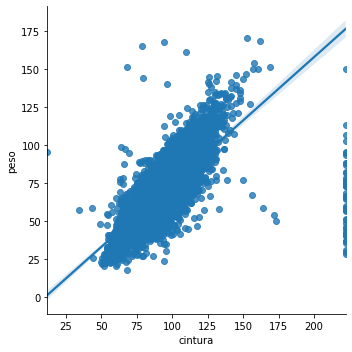

In [5]:
rv= sns.lmplot(
    x='cintura',
    y= 'peso',
    fit_reg= True, 
    data = df    
) 

plt.show()

In [6]:
ft= result.fittedvalues
ft

0        73.762068
1        44.906672
2        47.900315
3        42.079342
4        85.653485
           ...    
18635    69.022133
18636    77.379387
18637    51.018694
18638    74.801528
18639    81.620382
Length: 18032, dtype: float64

In [7]:
residuals= result.resid
residuals

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64

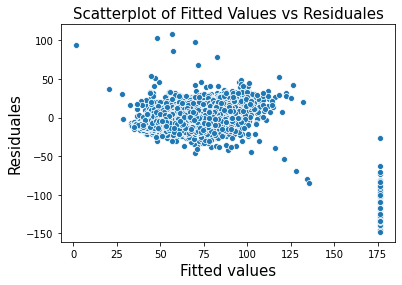

In [8]:
fv=sns.scatterplot(x=ft,
                   y= residuals)   
fv.set_xlabel('Fitted values',
             size=15)

fv.set_ylabel('Residuales',
             size=15)
fv.set_title('Scatterplot of Fitted Values vs Residuales',
            size=15)
plt.show()

# Hombres


In [9]:
just_hombres=((df['sexo']==1))

In [10]:
hombres= df[just_hombres] 
hombres.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.400,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
5,241555,3,24,SAN LUIS POTOSI,1,10,7,31.900,1,141.45,...,20:12,1,20:19,1,M2435,5,3,1,588.463281,245
9,31220,3,3,BAJA CALIFORNIA SUR,1,10,10,48.025,1,147.05,...,17:09,2,17:09,1,M0331,5,3,1,138.063636,35
17,320763,4,32,ZACATECAS,1,11,3,31.500,1,140.65,...,12:40,1,12:55,1,M3220,3,2,1,1285.844656,323
21,261348,5,26,SONORA,1,11,7,59.850,2,146.50,...,7:00,2,7:10,1,M2632,2,1,2,737.343409,262


In [11]:
peso_h = hombres['peso']
cintura_h= hombres['cintura']
model_h= sm.OLS.from_formula('peso_h~cintura_h', #peso= b0+cintura*b1
                             data=just_hombres)
result=model_h.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 peso_h   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 2.022e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:31:58   Log-Likelihood:                -30486.
No. Observations:                8154   AIC:                         6.098e+04
Df Residuals:                    8152   BIC:                         6.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.5015      0.599    -27.556      0.000     -17.675     -15.328
cintura_h      0.9558      0.007    142.200      0.000       0.943       0.969
==============================================================================
Omnibus:                     6572.799   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           878711.348
Skew:                          -3.142   Prob(JB):                         0.00
Kurtosis:                      53.466   Cond. No.                         474.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

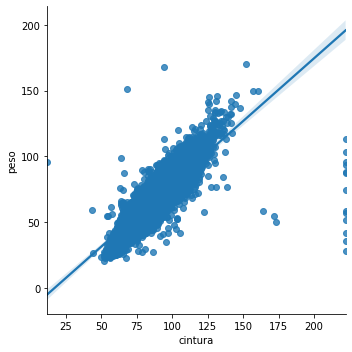

In [12]:
rv_h= sns.lmplot(
    x='cintura',
    y= 'peso',
    fit_reg= True, 
    data = hombres    
) 

plt.show()

In [13]:
ft_h= result.fittedvalues
ft_h

3         41.418430
5         40.367079
9         59.625918
17        41.514007
21        75.443972
            ...    
18626     83.137951
18627     79.792743
18630     63.401224
18634    109.660670
18637     51.692997
Length: 8154, dtype: float64

In [14]:
residuals_h= result.resid
residuals_h

3        -8.018430
5        -8.467079
9       -11.600918
17      -10.014007
21      -15.593972
           ...    
18626    -5.787951
18627   -11.192743
18630    -6.351224
18634     9.189330
18637    -4.942997
Length: 8154, dtype: float64

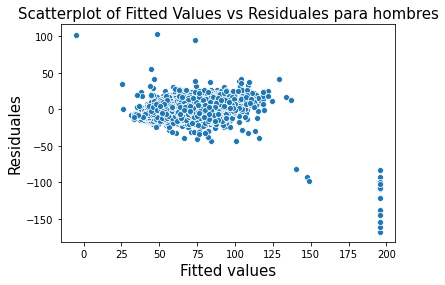

In [15]:
fv_h=sns.scatterplot(x=ft_h,
                   y= residuals_h)   
fv_h.set_xlabel('Fitted values',
             size=15)

fv_h.set_ylabel('Residuales',
             size=15)
fv_h.set_title('Scatterplot of Fitted Values vs Residuales para hombres',
            size=15)
plt.show()

# Mujeres

In [16]:
just_mujeres=((df['sexo']==2))

In [17]:
mujeres= df[just_mujeres] 
mujeres.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
6,211879,2,21,PUEBLA,2,10,9,31.95,2,134.95,...,22:22,2,15:11,1,M2144,1,1,1,1879.750532,211


In [18]:
peso_m = mujeres['peso']
cintura_m= mujeres['cintura']
model_m= sm.OLS.from_formula('peso_m~cintura_m', #peso= b0+cintura*b1
                             data=just_mujeres)
result=model_m.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 peso_m   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:32:56   Log-Likelihood:                -37386.
No. Observations:                9878   AIC:                         7.478e+04
Df Residuals:                    9876   BIC:                         7.479e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1852      0.562     -3.887      0.000      -3.287      -1.083
cintura_m      0.7368      0.006    117.510      0.000       0.724       0.749
==============================================================================
Omnibus:                     6504.425   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           441820.169
Skew:                          -2.437   Prob(JB):                         0.00
Kurtosis:                      35.399   Cond. No.                         470.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

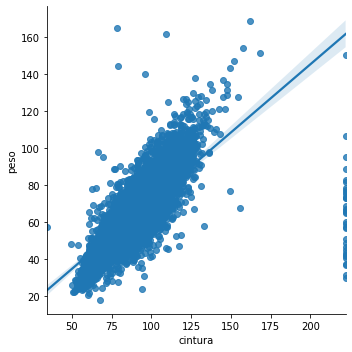

In [19]:
rv_m= sns.lmplot(
    x='cintura',
    y= 'peso',
    fit_reg= True, 
    data = mujeres   
) 

plt.show()

In [20]:
ft_m= result.fittedvalues
ft_m

0        70.535803
1        44.969265
2        47.621701
4        81.071869
6        40.032786
           ...    
18633    67.146579
18635    66.336112
18636    73.740830
18638    71.456788
18639    77.498448
Length: 9878, dtype: float64

In [21]:
residuals_m= result.resid
residuals_m

0         3.164197
1        -9.319265
2         7.178299
4        16.878131
6        -8.082786
           ...    
18633     8.253421
18635     9.463888
18636    -4.340830
18638   -12.406788
18639     2.501552
Length: 9878, dtype: float64

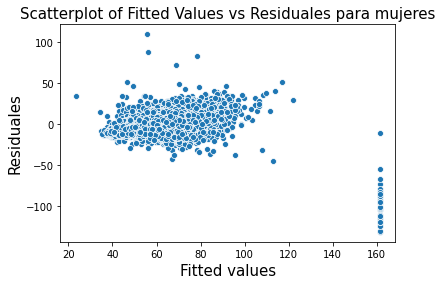

In [22]:
fv_m=sns.scatterplot(x=ft_m,
                   y= residuals_m)   
fv_m.set_xlabel('Fitted values',
             size=15)

fv_m.set_ylabel('Residuales',
             size=15)
fv_m.set_title('Scatterplot of Fitted Values vs Residuales para mujeres',
            size=15)
plt.show()